In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# to output everything in a cell instead of only the last output

# standard imports
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers
import random
from sklearn import preprocessing
from keras.callbacks import History
import matplotlib.pyplot as plt
from keras.utils import np_utils
import os
from tensorflow.keras.optimizers import Adam
from plain_neural_network import*
from keras import backend as K

%matplotlib inline

2022-04-03 21:31:10.193152: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /global/AWIsoft/proj/4.9.3/lib:/global/AWIsoft/intel//2018/intelpython2/lib
2022-04-03 21:31:10.193185: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
input_dir = "/work/ollie/bpanthi/nn_interpolation/"
data_x = load_data_x(input_dir)

data_x = data_x[:,300:556, 200:456]
data_x[data_x>1000] = 0

print("Shape of data X:", data_x.shape)

/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_01_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_02_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_03_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_04_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_05_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_06_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_07_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_08_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_09_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_10_new.nc
/work/ollie/bpanthi/nn_interpolation/ssh_gridded_1961_001_11_new.nc
Shape of data X: (332, 256, 256)


In [3]:
input_dir = "/home/ollie/ssunar/segmentation_masks/"
data_y = load_data_y(input_dir)

data_y = data_y[:,300:556, 200:456]

print("Shape of data Y:",data_y.shape)

/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_01_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_02_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_03_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_04_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_05_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_06_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_07_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_08_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_09_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_10_new.nc
/home/ollie/ssunar/segmentation_masks/segmentation_mask_nn_1961_001_11_new.nc
Shape of data Y: (332, 256, 256)


In [4]:
img_size = (256, 256)
num_classes = 3
batch_size = 16
epochs = 100
total_samples = len(data_x)

In [5]:
# data_x = data_x[:,300:556, 200:456]
# data_y = data_y[:,300:556, 200:456]
# data_x[data_x>1000] = 0

# SSH_train = data_x
# Seg_train = data_y

In [6]:
model = get_model(img_size, num_classes)
model.summary()

2022-04-03 21:31:20.919690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /global/AWIsoft/proj/4.9.3/lib:/global/AWIsoft/intel//2018/intelpython2/lib
2022-04-03 21:31:20.919738: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-03 21:31:20.919766: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (prod-0298): /proc/driver/nvidia/version does not exist
2022-04-03 21:31:20.920034: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 separable_conv2d (SeparableCon  (None, 256, 256, 32  41         ['input_1[0][0]']                
 v2D)                           )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 32  128        ['separable_conv2d[0][0]']       
 alization)                     )                                                             

                                                                                                  
 batch_normalization_7 (BatchNo  (None, 32, 32, 32)  128         ['separable_conv2d_7[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 activation_7 (Activation)      (None, 32, 32, 32)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 dropout_3 (Dropout)            (None, 32, 32, 32)   0           ['activation_7[0][0]']           
                                                                                                  
 up_sampling2d (UpSampling2D)   (None, 64, 64, 32)   0           ['dropout_3[0][0]']              
                                                                                                  
 concatena

                                )                                                                 
                                                                                                  
 separable_conv2d_14 (Separable  (None, 256, 256, 3)  128        ['dropout_6[0][0]']              
 Conv2D)                                                                                          
                                                                                                  
 reshape (Reshape)              (None, 65536, 3)     0           ['separable_conv2d_14[0][0]']    
                                                                                                  
 activation_14 (Activation)     (None, 65536, 3)     0           ['reshape[0][0]']                
                                                                                                  
Total params: 22,953
Trainable params: 22,057
Non-trainable params: 896
_____________________________________

In [7]:
#Loss function 
#defined from the paper:
#Santana et al._2020_Neural network training for the detection and classification of oceanic mesoscale eddies

unique, counts = np.unique(data_y, return_counts=True)
dict(zip(unique, counts))

freq = [np.sum(counts)/j for j in counts]
weightsSeg = [f/np.sum(freq) for f in freq]

def dice_coef_anti(y_true, y_pred):
    smooth = 1.  # to avoid zero division
    y_true_anti = y_true[:,:,1]
    y_pred_anti = y_pred[:,:,1]
    intersection_anti = K.sum(y_true_anti * y_pred_anti)
    return (2 * intersection_anti + smooth) / (K.sum(y_true_anti)+ K.sum(y_pred_anti) + smooth)

def dice_coef_cyc(y_true, y_pred):
    smooth = 1.  # to avoid zero division
    y_true_cyc = y_true[:,:,2]
    y_pred_cyc = y_pred[:,:,2]
    intersection_cyc = K.sum(y_true_cyc * y_pred_cyc)
    return (2 * intersection_cyc + smooth) / (K.sum(y_true_cyc) + K.sum(y_pred_cyc) + smooth)

def dice_coef_nn(y_true, y_pred):
    smooth = 1.  # to avoid zero division
    y_true_nn = y_true[:,:,0]
    y_pred_nn = y_pred[:,:,0]
    intersection_nn = K.sum(y_true_nn * y_pred_nn)
    return (2 * intersection_nn + smooth) / (K.sum(y_true_nn) + K.sum(y_pred_nn) + smooth)
    
def mean_dice_coef(y_true, y_pred):
    return (dice_coef_anti(y_true, y_pred) + dice_coef_cyc(y_true, y_pred) + dice_coef_nn(y_true, y_pred))/3.

def weighted_mean_dice_coef(y_true, y_pred):
    return (weightsSeg[2]*dice_coef_anti(y_true, y_pred) + weightsSeg[1]*dice_coef_cyc(y_true, y_pred) + weightsSeg[0]*dice_coef_nn(y_true, y_pred))
  
def dice_coef_loss(y_true, y_pred):
    return 1 - weighted_mean_dice_coef(y_true, y_pred)

{0.0: 18625831, 1.0: 1792932, 2.0: 1339189}

In [8]:
# Split our img paths into a training and a validation set
split = 0.2
train_samples = int((1-split)*total_samples)
#same seed must be used
random.Random(0).shuffle(data_x)
random.Random(0).shuffle(data_y)
train_input = data_x[0:train_samples]
train_target = data_y[0:train_samples]
val_input = data_x[train_samples:total_samples]
val_target = data_y[train_samples:total_samples]

print("train_input:", train_input.shape)
print("val_input:", val_input.shape)

# Instantiate data Sequences for each split
train_gen = plain_net_eddy(batch_size, img_size, train_input, train_target)
val_gen = plain_net_eddy(batch_size, img_size, val_input, val_target)
print("Size of each batch: ",train_gen[1][0].shape)

train_input: (265, 256, 256)
val_input: (67, 256, 256)
Size of each batch:  (16, 256, 256, 1)


In [9]:
file_path_save = "/work/ollie/bpanthi/NN_weights"
model.compile(optimizer=Adam(lr=1e-3), loss=dice_coef_loss, metrics=['categorical_accuracy', mean_dice_coef, weighted_mean_dice_coef])

callbacks = [keras.callbacks.ModelCheckpoint(file_path_save, save_best_only=True , monitor='val_loss',save_weights_only=True),
            keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, mode='auto', min_delta=1e-30, min_lr=1e-30)]

# Train the model, doing validation at the end of each epoch.
history = model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks, shuffle=True,verbose=1)

Epoch 1/100


/home/ollie/bpanthi/.conda/envs/eddy-tracking/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 23s 1s/step - loss: 0.8505 - categorical_accuracy: 0.2357 - mean_dice_coef: 0.2361 - weighted_mean_dice_coef: 0.1495 - val_loss: 0.8688 - val_categorical_accuracy: 0.8604 - val_mean_dice_coef: 0.2374 - val_weighted_mean_dice_coef: 0.1312 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 19s 1s/step - loss: 0.8151 - categorical_accuracy: 0.4805 - mean_dice_coef: 0.2640 - weighted_mean_dice_coef: 0.1849 - val_loss: 0.8688 - val_categorical_accuracy: 0.8604 - val_mean_dice_coef: 0.2384 - val_weighted_mean_dice_coef: 0.1312 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 19s 1s/step - loss: 0.7834 - categorical_accuracy: 0.4761 - mean_dice_coef: 0.2867 - weighted_mean_dice_coef: 0.2166 - val_loss: 0.8687 - val_categorical_accuracy: 0.8604 - val_mean_dice_coef: 0.2404 - val_weighted_mean_dice_coef: 0.1313 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 19s 1s/step - loss: 0.7531 - categorical_accura

16/16 [==============================] - 19s 1s/step - loss: 0.3837 - categorical_accuracy: 0.8755 - mean_dice_coef: 0.7056 - weighted_mean_dice_coef: 0.6163 - val_loss: 0.9618 - val_categorical_accuracy: 0.8604 - val_mean_dice_coef: 0.3093 - val_weighted_mean_dice_coef: 0.0382 - lr: 2.5000e-04
Epoch 27/100
16/16 [==============================] - 19s 1s/step - loss: 0.3802 - categorical_accuracy: 0.8772 - mean_dice_coef: 0.7085 - weighted_mean_dice_coef: 0.6198 - val_loss: 0.9617 - val_categorical_accuracy: 0.8603 - val_mean_dice_coef: 0.3094 - val_weighted_mean_dice_coef: 0.0383 - lr: 2.5000e-04
Epoch 28/100
16/16 [==============================] - 19s 1s/step - loss: 0.3793 - categorical_accuracy: 0.8769 - mean_dice_coef: 0.7091 - weighted_mean_dice_coef: 0.6207 - val_loss: 0.9601 - val_categorical_accuracy: 0.8601 - val_mean_dice_coef: 0.3107 - val_weighted_mean_dice_coef: 0.0399 - lr: 2.5000e-04
Epoch 29/100
16/16 [==============================] - 19s 1s/step - loss: 0.3765 - cat

Epoch 53/100
16/16 [==============================] - 19s 1s/step - loss: 0.3525 - categorical_accuracy: 0.8881 - mean_dice_coef: 0.7311 - weighted_mean_dice_coef: 0.6475 - val_loss: 0.5584 - val_categorical_accuracy: 0.8312 - val_mean_dice_coef: 0.5785 - val_weighted_mean_dice_coef: 0.4416 - lr: 2.5000e-04
Epoch 54/100
16/16 [==============================] - 19s 1s/step - loss: 0.3535 - categorical_accuracy: 0.8872 - mean_dice_coef: 0.7303 - weighted_mean_dice_coef: 0.6465 - val_loss: 0.5553 - val_categorical_accuracy: 0.8326 - val_mean_dice_coef: 0.5811 - val_weighted_mean_dice_coef: 0.4447 - lr: 2.5000e-04
Epoch 55/100
16/16 [==============================] - 20s 1s/step - loss: 0.3526 - categorical_accuracy: 0.8880 - mean_dice_coef: 0.7312 - weighted_mean_dice_coef: 0.6474 - val_loss: 0.5524 - val_categorical_accuracy: 0.8303 - val_mean_dice_coef: 0.5830 - val_weighted_mean_dice_coef: 0.4476 - lr: 2.5000e-04
Epoch 56/100
16/16 [==============================] - 20s 1s/step - loss:

16/16 [==============================] - 19s 1s/step - loss: 0.3398 - categorical_accuracy: 0.8927 - mean_dice_coef: 0.7412 - weighted_mean_dice_coef: 0.6602 - val_loss: 0.5441 - val_categorical_accuracy: 0.8404 - val_mean_dice_coef: 0.5915 - val_weighted_mean_dice_coef: 0.4559 - lr: 2.5000e-04
Epoch 80/100
16/16 [==============================] - 19s 1s/step - loss: 0.3377 - categorical_accuracy: 0.8928 - mean_dice_coef: 0.7428 - weighted_mean_dice_coef: 0.6623 - val_loss: 0.5453 - val_categorical_accuracy: 0.8398 - val_mean_dice_coef: 0.5907 - val_weighted_mean_dice_coef: 0.4547 - lr: 2.5000e-04
Epoch 81/100
16/16 [==============================] - 19s 1s/step - loss: 0.3375 - categorical_accuracy: 0.8937 - mean_dice_coef: 0.7432 - weighted_mean_dice_coef: 0.6625 - val_loss: 0.5395 - val_categorical_accuracy: 0.8368 - val_mean_dice_coef: 0.5932 - val_weighted_mean_dice_coef: 0.4605 - lr: 2.5000e-04
Epoch 82/100
16/16 [==============================] - ETA: 0s - loss: 0.3377 - categor

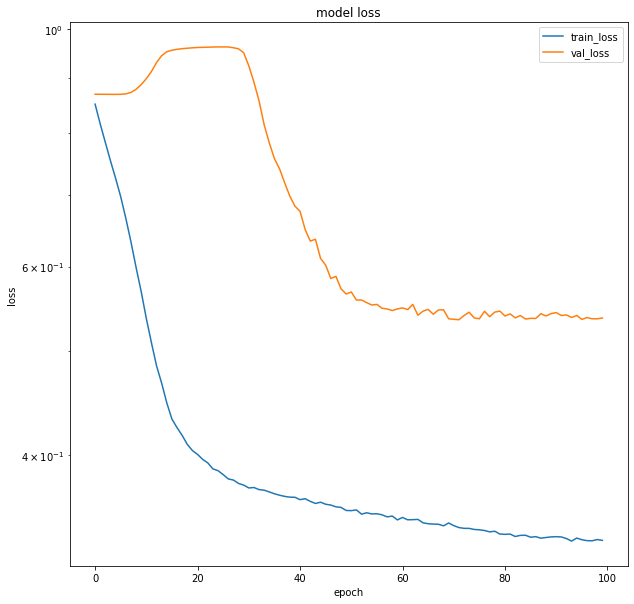

In [10]:
plt.figure(figsize=(10, 10))
plt.semilogy(model.history.history['loss'])
plt.semilogy(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right');

In [16]:
# val_gen = plain_net_eddy(batch_size, img_size, val_input, val_target)
# mask = np.expand_dims(val_preds, axis=-1)
val_gen = data_x[60]
val_gen = np.reshape(val_gen,(1,img_size[0],img_size[1],1))
print(val_gen.shape)
val_preds = model.predict(val_gen)
print(val_preds.shape)

(1, 256, 256, 1)
(1, 65536, 3)


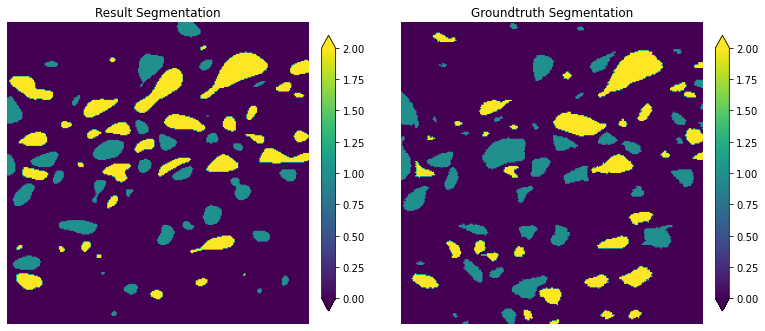

In [17]:
#seeing the prediction of one image of the validation set
%matplotlib inline
mask = np.argmax(np.reshape(val_preds[0],(1,img_size[1],img_size[0],3)), axis=-1)
mask = np.reshape(mask,(img_size[0],img_size[1]))

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.imshow(mask.T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Result Segmentation');

plt.subplot(132)
plt.imshow(data_y[60].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Groundtruth Segmentation');